## In this python notebook i have performed some basic EDA on the titatnic dataset from **[kaagle](https://www.kaggle.com)**

---
### For further information regarding the dataset i am attaching the orginial dataset link down here:
### Dataset Link : [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/data?select=train.csv)

In [ ]:
## importing some basic libraries
import pandas as pd   #for handling data preprocessing
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('titanic_train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(f'No of columns: {df.shape[0]} \nNo of Rows: {df.shape[1]}')

No of columns: 891 
No of Rows: 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


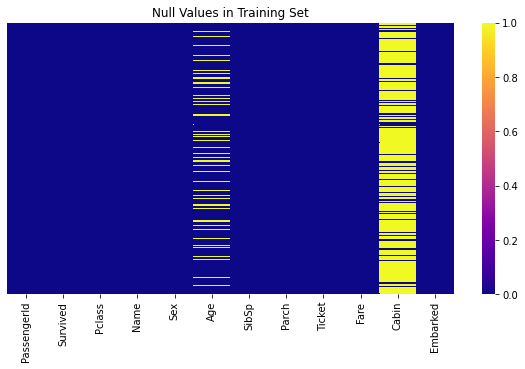

In [ ]:
## Checking Missing Values
# Method 1
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels = False, cmap='plasma')
plt.title('Null Values in Training Set');

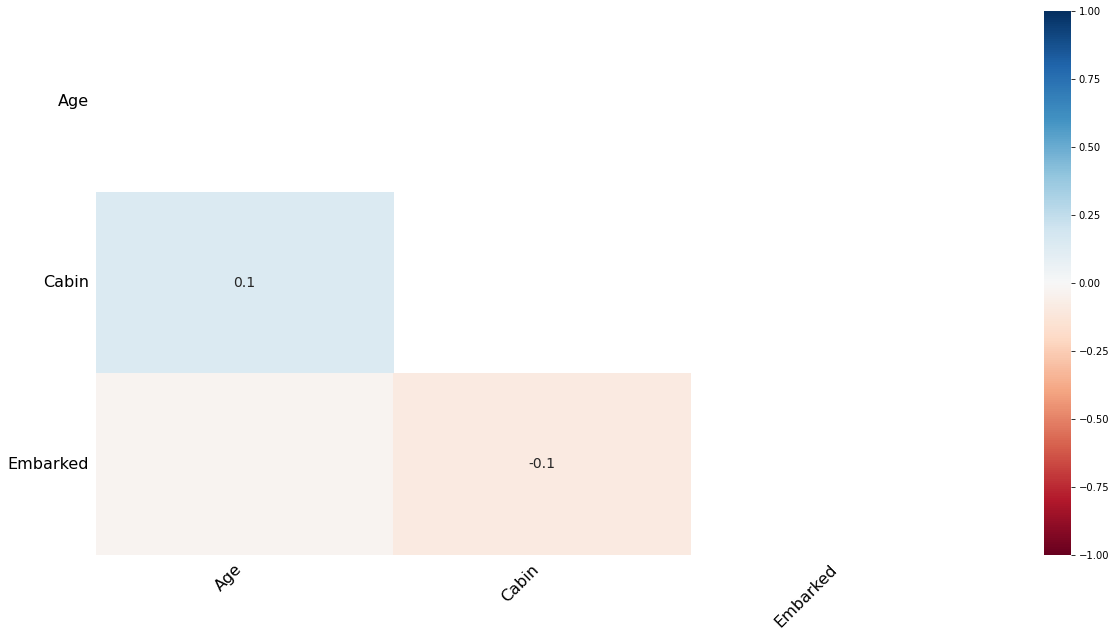

In [ ]:
msno.heatmap(df, figsize=(20,10))

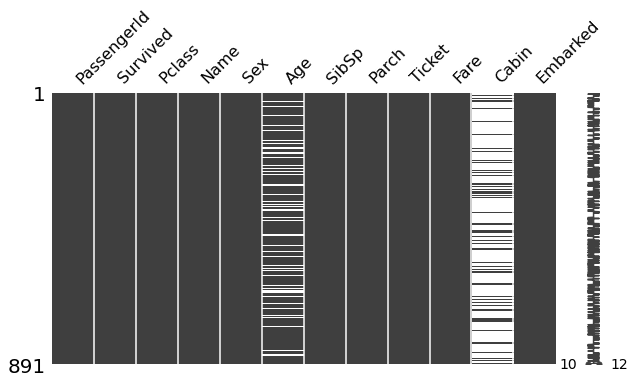

In [ ]:
# Method 2
msno.matrix(df, figsize=(10,5))

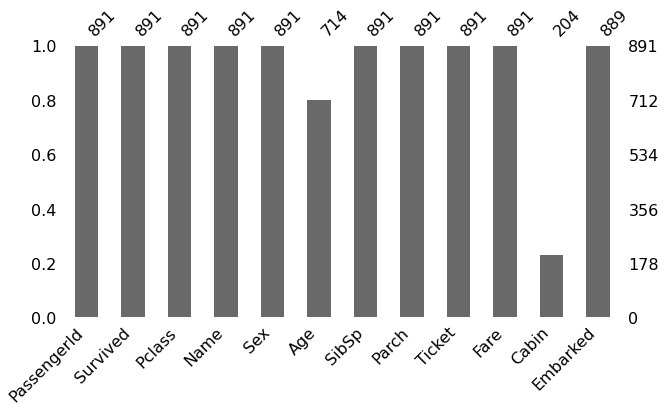

In [ ]:
# Method 3
msno.bar(df, figsize=(10,5))

In [ ]:
# Method 4
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
## Summary as of now:
# 1) Missing Values in Age, Cabin, Embarked columns
# 2) AS 77.1%  of the values in Cabin is null, drop it

In [ ]:
## Droping Cabin
df.drop(columns='Cabin', inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
## I have decided to handle missing values of 'Age' and 'Embarked' later on as it might create skewness in data.

In [ ]:
## checking unique values in different features
print(f'Unique Values in Survived :{df.Survived.unique()}')
print(f'Unique Values in Pclass :{df.Pclass.unique()}')
print(f'Unique Values in SibSp :{df.SibSp.unique()}')
print(f'Unique Values in Parch :{df.Parch.unique()}')
print(f'Unique Values in Embarked :{df.Embarked.unique()}')

# Using Loop to do the same

#for col in df:
 # print(f'Unique  Values in {col}: {df[col].unique()}')

Unique Values in Survived :[0 1]
Unique Values in Pclass :[3 1 2]
Unique Values in SibSp :[1 0 3 4 2 5 8]
Unique Values in Parch :[0 1 2 5 3 4 6]
Unique Values in Embarked :['S' 'C' 'Q' nan]


In [ ]:
## Lets have some basic visualisation of the features with non-null values.
## Univariate analysis
## Our main target is 'Survived' Feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 1.0, 'Number of passengers survived (Embarked)')

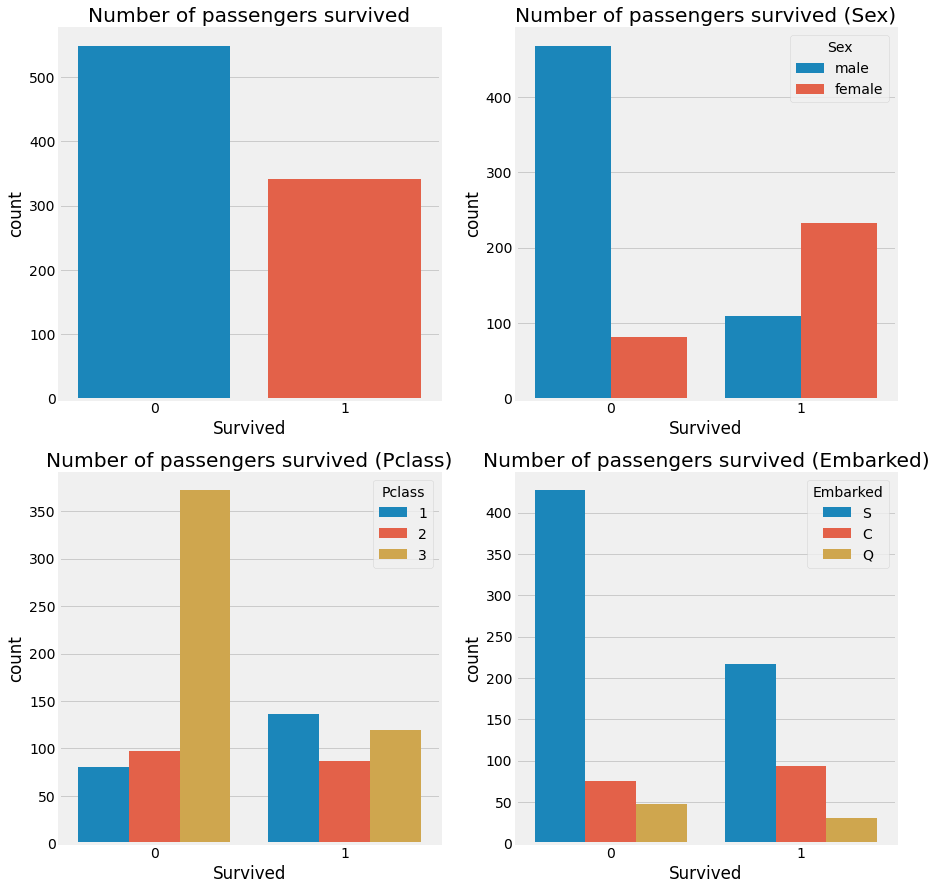

In [ ]:
# Basic setting
plt.figure(figsize=(15,15))
plt.style.use('fivethirtyeight')

# Number of Passengers Survived
plt.subplot(2,2,1)
sns.countplot(df['Survived'])
plt.title('Number of passengers survived')

# Survival on the Basis of sex
plt.subplot(2,2,2)
sns.countplot(df['Survived'], hue='Sex', data=df)
plt.title('Number of passengers survived (Sex)')

# Survival on the basis of Pclass
plt.subplot(2,2,3)
sns.countplot(df['Survived'], hue='Pclass', data=df)
plt.title('Number of passengers survived (Pclass)')

# Survival on the basis of Port embark
plt.subplot(2,2,4)
sns.countplot(df['Survived'], hue='Embarked', data=df)
plt.title('Number of passengers survived (Embarked)')



In [ ]:
# Lets Visualise all Feature more vivedly
# Following function creates Percentage on any kind of bar graph

def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


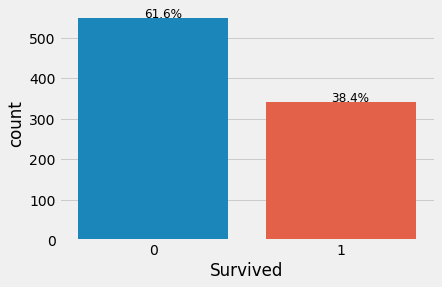

In [ ]:
# Lets look at target feature
ax = sns.countplot(df['Survived'])
without_hue(ax,df['Survived'])

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


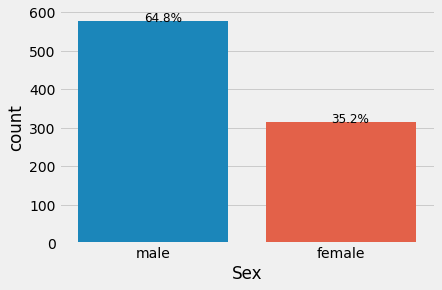

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


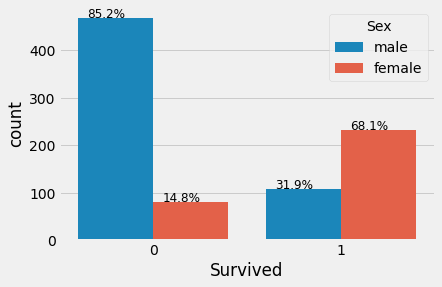

In [ ]:
# Lets Look at Sex feature
ax = sns.countplot(df['Sex'])
without_hue(ax,df['Sex'])

ax = sns.countplot(df['Survived'], hue='Sex', data=df)
with_hue(ax,df['Survived'],2,2)

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
## Summary as of now:
# 1) No of Male survived : 109 aprox out of 577 : 18.9% survival chance
# 2) No of female survived: 233 aprox out of 314 : 74.2% survival chance
# 3) Survival chance of a female is far greater than that of a male

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


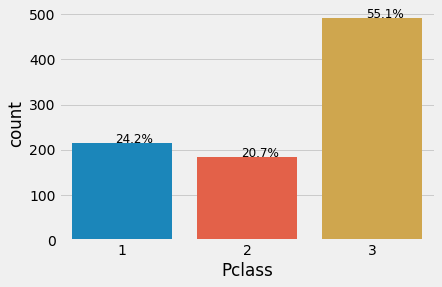

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


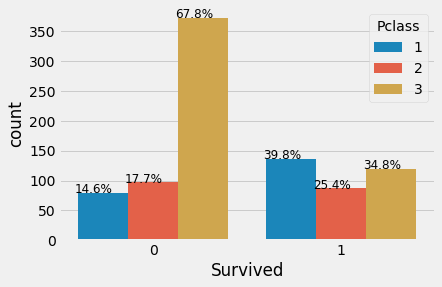

In [ ]:
## Lets look at Passenger class
ax = sns.countplot(df['Pclass'])
without_hue(ax,df['Pclass'])

ax = sns.countplot(df['Survived'], hue='Pclass', data=df)
with_hue(ax,df['Survived'],2,3)


In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
## Summary as of now
# 1) 1st Class passenger : 136 survived out of 216 : 63% survival rate
# 2) 2nd Class passenger : 87 survived out of 184 : 47.2% survival rate
# 3) 3rd class passenger : 119 survived out of 491 : 24.2% survival rate

In [ ]:
## Alterrative Method to get the survival percentage
df[df['Pclass'] == 1]['Survived'].value_counts().values

array([136,  80])

In [ ]:
pclass1 = df[df['Pclass'] == 1]['Survived'].value_counts(normalize=True).values[0]*100
pclass2 = df[df['Pclass'] == 2]['Survived'].value_counts(normalize=True).values[1]*100
pclass3 = df[df['Pclass'] == 3]['Survived'].value_counts(normalize=True).values[1]*100

print('Pclass 1 survival rate: ','{:.1f}%'.format(pclass1))
print('Pclass 2 survival rate: ','{:.1f}%'.format(pclass2))
print('Pclass 3 survival rate: ','{:.1f}%'.format(pclass3))

Pclass 1 survival rate:  63.0%
Pclass 2 survival rate:  47.3%
Pclass 3 survival rate:  24.2%


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


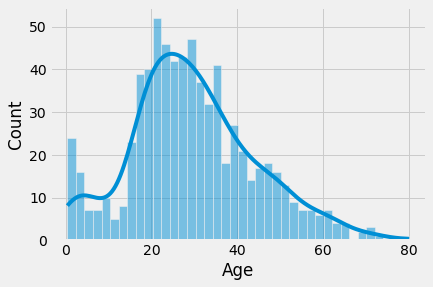

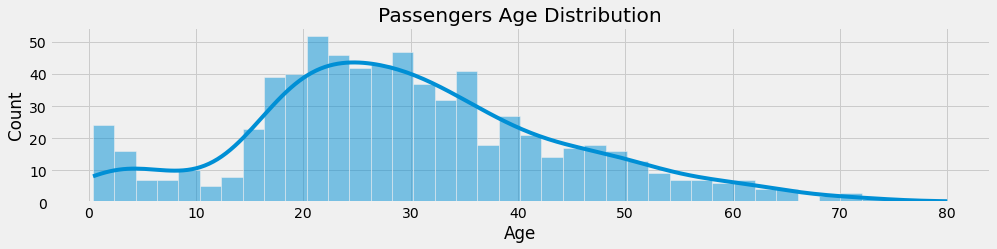

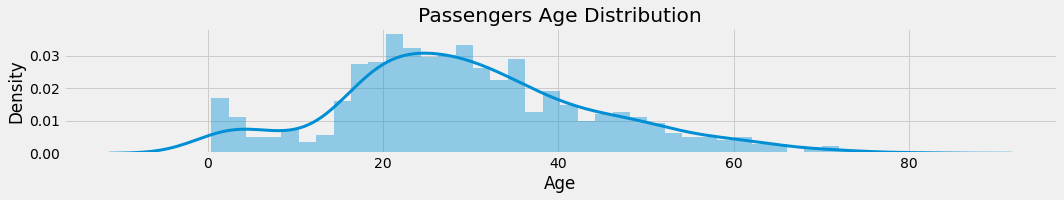

In [ ]:
## Its time to look for Age Column 
sns.histplot(df['Age'], kde='True',bins=40)
plt.figure(figsize=(15,3))

# Method 1 (Using Histogram)
# plot a univariate distribution of Age observations
sns.histplot(df[df['Age']>0]['Age'], kde=True, bins=40)
plt.title('Passengers Age Distribution')

# Merthod 2 (Using Distribution plot)
plt.figure(figsize=(15,3))
sns.distplot(df[df['Age']>0]['Age'], kde_kws={"lw": 3} , bins = 40)
plt.title('Passengers Age Distribution')

#clean layout
plt.tight_layout()

In [ ]:
# Age column has non-uniform data and many outliers
# Outlier : An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

Text(0, 0.5, 'Passenger status after the tragedy')

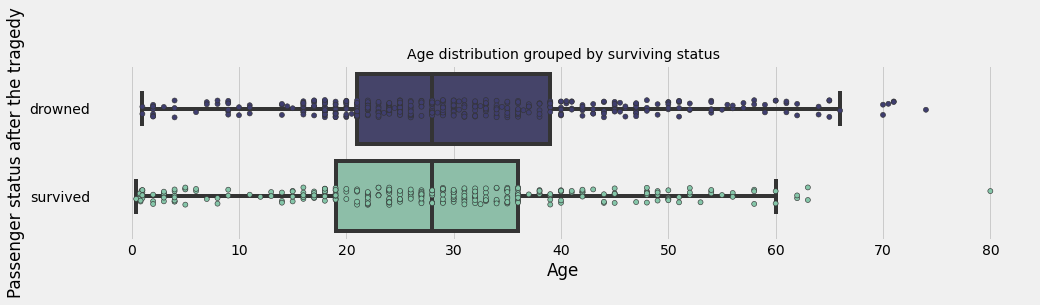

In [ ]:
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'Survived', x = 'Age', data = df,
     palette=["#3f3e6fd1", "#85c6a9"],fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'Survived', x = 'Age', data = df,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


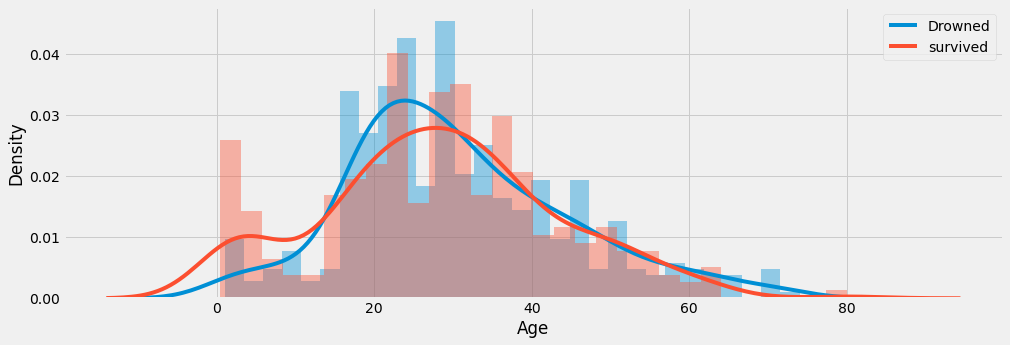

In [ ]:
# Survived with age
plt.figure(figsize=(15,5))
sns.distplot(df[df['Survived']==0]['Age'], bins=30)
sns.distplot(df[df['Survived']==1]['Age'], bins=30)
plt.legend(labels=['Drowned','survived'])

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


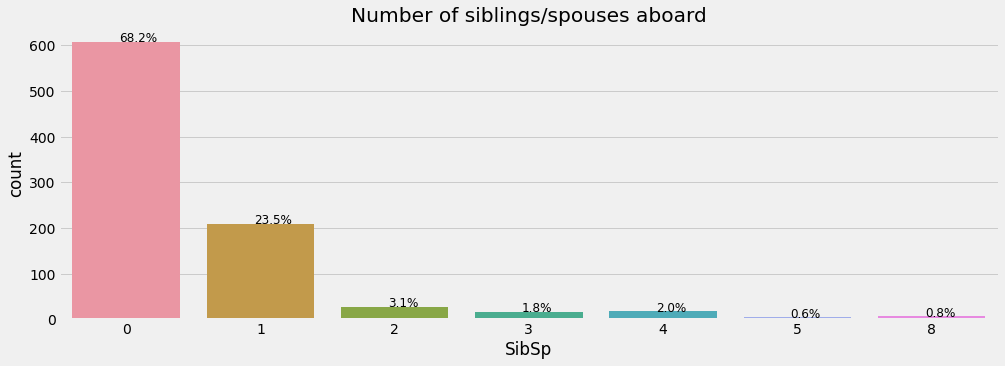

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


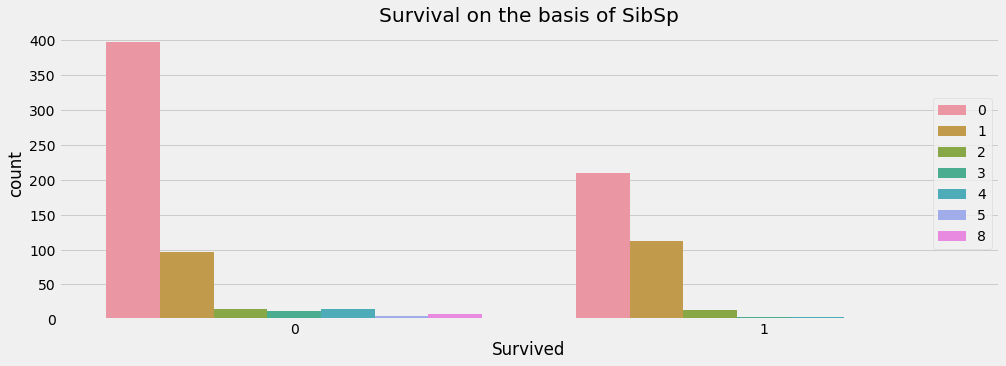

In [ ]:
#Lets Check SibSp (Sibling/Spouses abroad)
plt.figure(figsize=(15,5))
plt.title('Number of siblings/spouses aboard')
ax = sns.countplot(df['SibSp'])
without_hue(ax,df['SibSp'])

plt.figure(figsize=(15,5))
plt.title('Survival on the basis of SibSp')
ax = sns.countplot(df['Survived'], hue=df['SibSp'])
plt.legend(loc='right')

In [ ]:
## Looks like single person Non-survived count is almost double than survived, while others have 50-50 % ratio

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


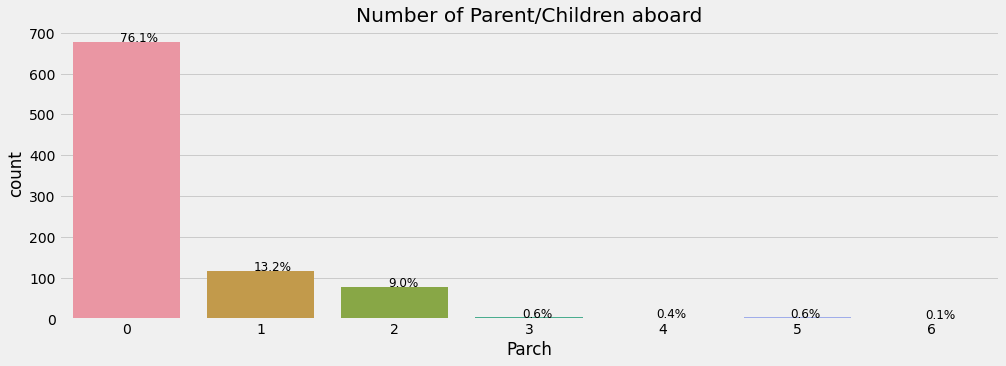

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


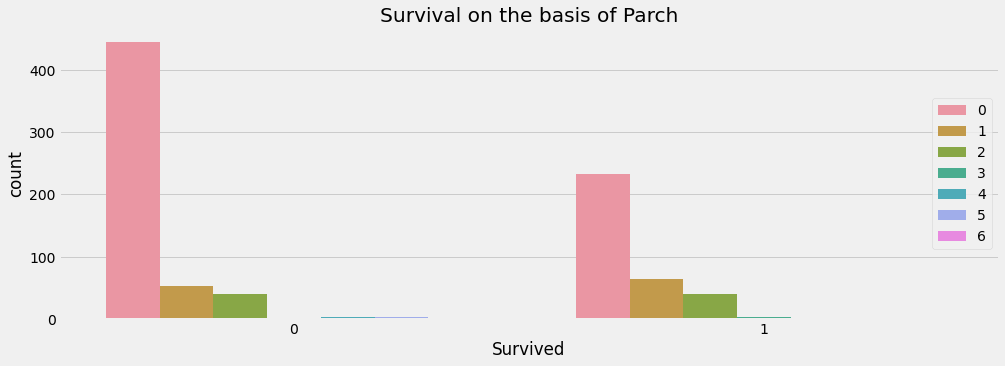

In [ ]:
# Lets check Parch (Parent/Children aboard)
plt.figure(figsize=(15,5))
plt.title('Number of Parent/Children aboard')
ax = sns.countplot(df['Parch'])
without_hue(ax,df['Parch'])

plt.figure(figsize=(15,5))
plt.title('Survival on the basis of Parch')
ax = sns.countplot(df['Survived'], hue=df['Parch'])
plt.legend(loc='right')

In [ ]:
## Almost single Non Survived person count is double that of survived.
## Rest person have 50-50 chance of survival

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


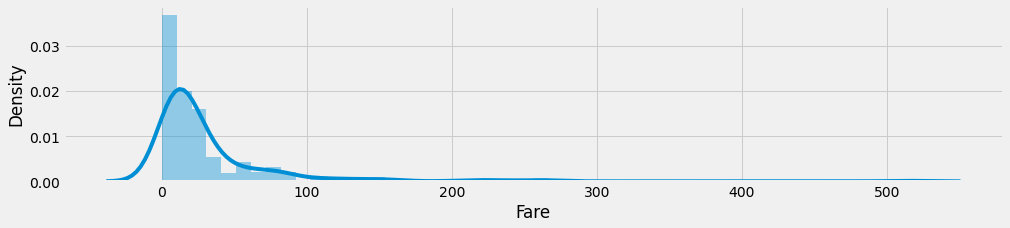

In [ ]:
## Lets Look at the dirstibution of Fare
plt.figure(figsize=(15,3))
sns.distplot(df['Fare'])

In [ ]:
## Somewhat right skewed distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


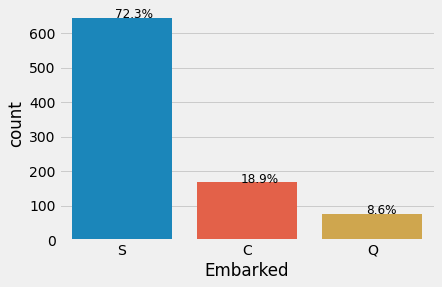

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


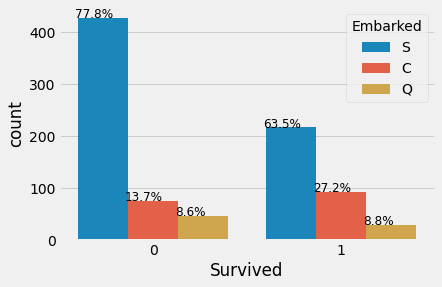

In [ ]:
## Lets Look at Port of Embark
ax = sns.countplot(df['Embarked'])
without_hue(ax,df['Embarked'])

ax = sns.countplot(df['Survived'], hue=df['Embarked'])
with_hue(ax,df['Survived'],2,3)


In [ ]:
## passenger boarded ship from 'S' port : 72.3% : 644 passenger
## passenger boarded ship from 'C' port : 18.9% : 168 passenger
## passenger boarded ship from 'Q' port : 8.6% :  79 passenger
## Pasenger survived who boarded from 'S' port : 217 : 33.7% survival rate
## Pasenger survived who boarded from 'C' port : 93 : 55.3% survival rate
## Pasenger survived who boarded from 'Q' port : 30 : 38% survival rate

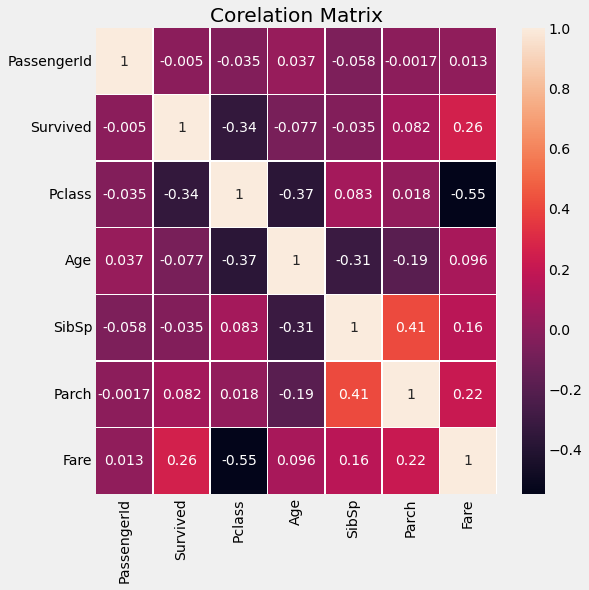

In [ ]:
## Now lets look into the correlation among the feature
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, linewidths=.5)
plt.title('Corelation Matrix');

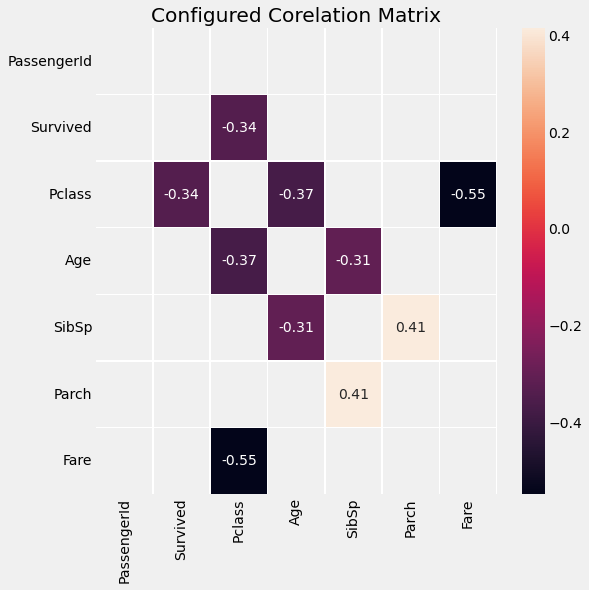

In [ ]:
# Configure the correlation matrix setting thershold value as (0.3 and -0.3)
plt.figure(figsize=(8,8))
corr = df.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr<=-0.3)) & (corr!=1)], annot=True, linewidths=.5)  # First we are taking or and then and operation
plt.title('Configured Corelation Matrix');

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.8% of the points cannot be placed; y

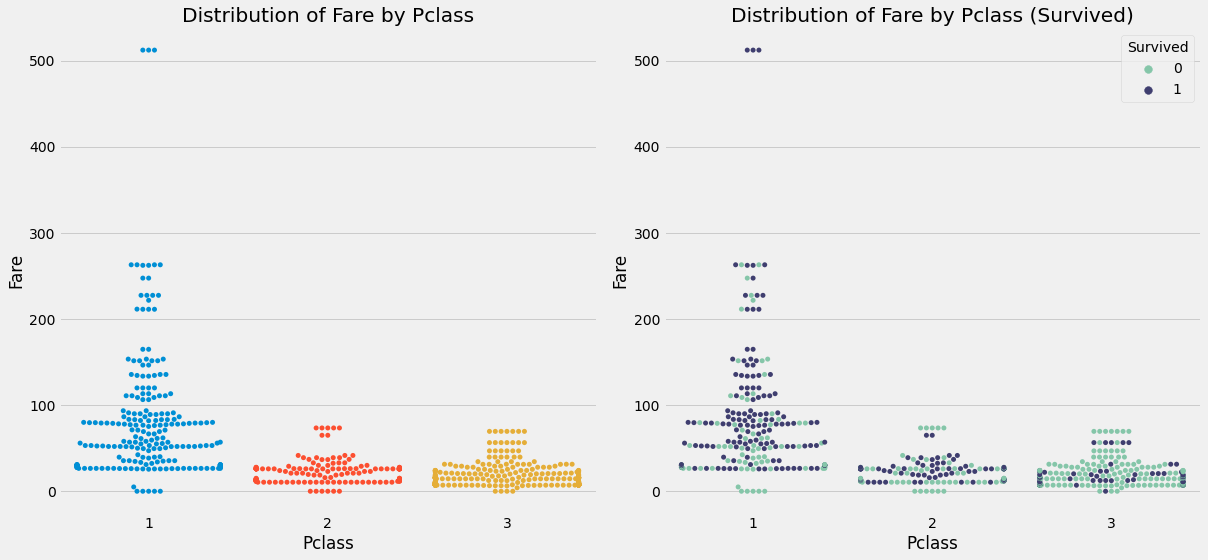

In [ ]:
# Lets Look at Fare vs Pclass
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
sns.swarmplot(x='Pclass', y='Fare', data=df)
plt.title('Distribution of Fare by Pclass')

plt.subplot(1,2,2)
sns.swarmplot(x='Pclass', y='Fare', hue='Survived', palette=["#85c6a9", "#3f3e6fd1"], data=df)
plt.title('Distribution of Fare by Pclass (Survived)')

plt.tight_layout()

In [ ]:
## We can observe that the distribution of prices for the second and third class is very similar.
## The distribution of first-class prices is very different, has a larger spread, and on average prices are higher.

Text(0.5, 1.0, 'Distribution of fare Vs Embarked')

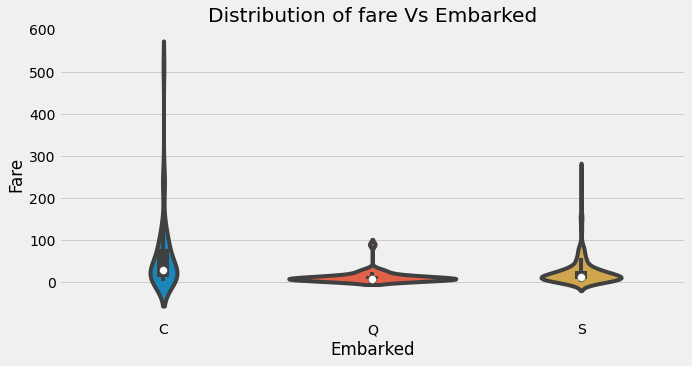

In [ ]:
#Lets look at Fare vs Embarked
plt.figure(figsize=(10,5))
sns.violinplot(x='Embarked', y='Fare', data=df, order = ['C', 'Q', 'S'])
plt.title('Distribution of fare Vs Embarked')

In [ ]:
## The wider fare distribution among passengers who embarked in Cherbourg.
## It makes scence - many first-class passengers boarded the ship here, but the share of third-class passengers is quite significant.
## The smallest variation in the price of passengers who boarded in q. Also, the average price of these passengers is the smallest,
## I think this is due to the fact that the path was supposed to be the shortest + almost all third-class passengers.

In [ ]:
## Now lets take care of missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
print('{:.2f}% of Age feature is missing.'.format(177*100/891))
print('{:.2f}% of Embarked feature is missing.'.format(2*100/891))

19.87% of Age feature is missing.
0.22% of Embarked feature is missing.


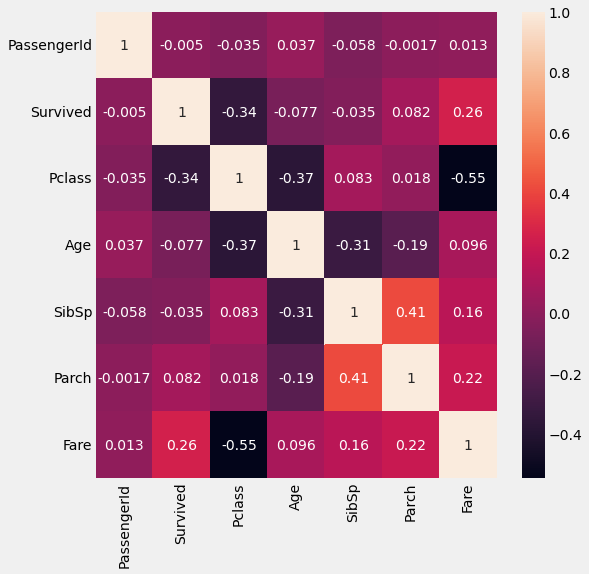

In [ ]:
# AGE {One of the effective ways to fill the null values is by finding correlation}
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
## As Age is maximum correlated with Pclass, lets find the median age per Pclass and replace null values with it.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.loc[df.Age.isnull(), 'Age'] = df.groupby("Pclass").Age.transform('mean')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.210527,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
## Lets Fill the null values of our Embarked feature
df['Embarked'].mode()
df['Embarked'].fillna('S',inplace =True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

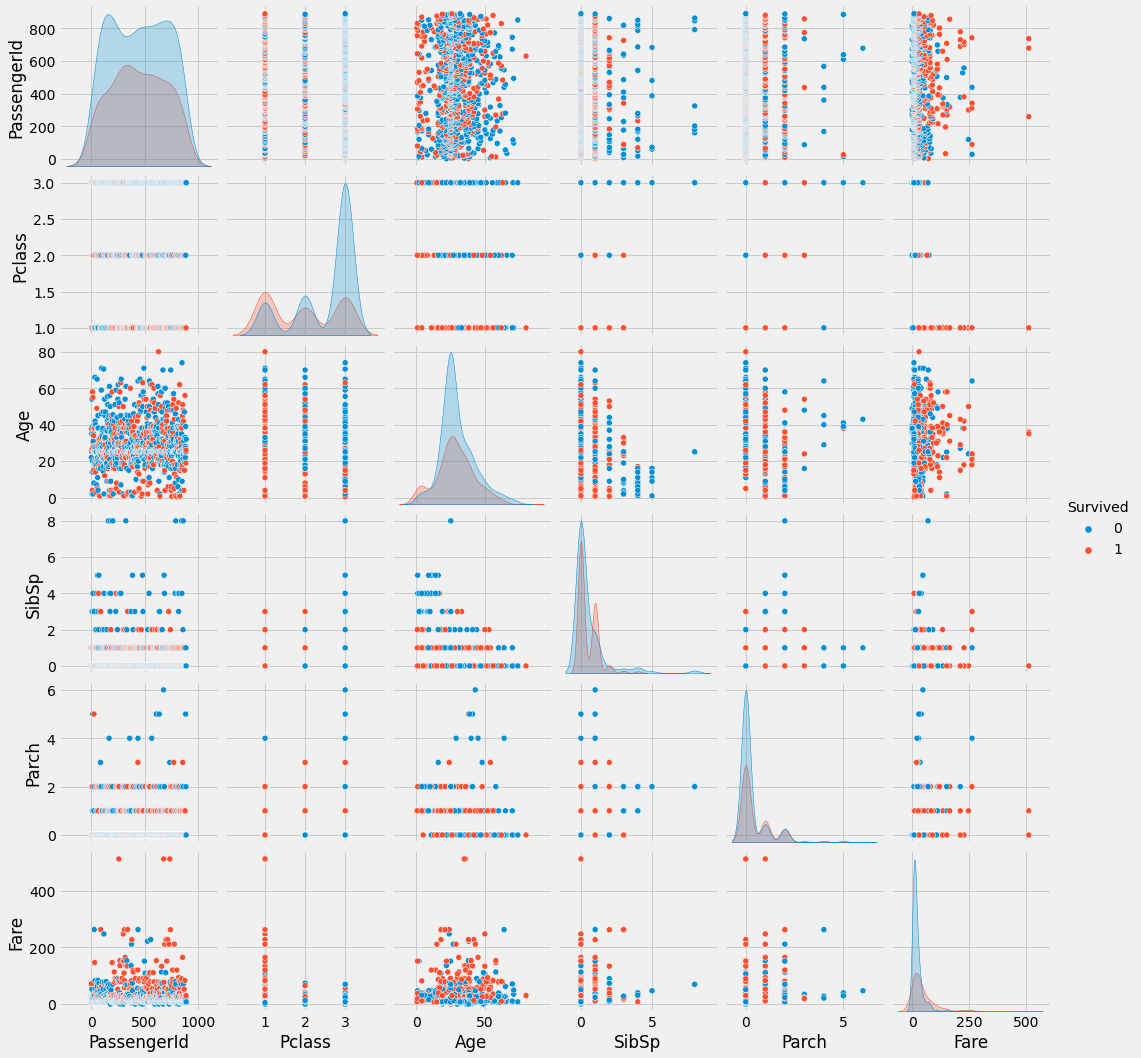

In [ ]:
sns.pairplot(df, hue='Survived')